# Week 1: Acercamiento a la programación en Ciencia de Datos

Jose Manuel Coello

## Objetivo

Mediante el uso de Google Collaborative crear un Notebook y realizar las
siguientes actividades:

1.  Descargar el dataset de peliculas y series de Kaggle.com:
    [DataSet](https://www.kaggle.com/datasets/krishnaraj30/movies-and-tv-shows).

2.  Usar el archivo CSV en un programa en Python.

3.  Contar la cantidad de ocurrencia de las categorias (i.e. el campo
    Listed In), por ejemplo: Comedy, Drama, etc.

4.  Imprimirlo en la salida.

En este caso ya se tiene el dataset en el directorio de trabajo,
procedemos a leer los datos.

In [1]:
import csv
# function to read a csv file
def read_csv_file(csv_file):
  """
  Read a csv file and return a nested list where each element is a row
  """
  table = []
  with open(csv_file, 'r', newline = '') as csvfile:
    csv_object = csv.reader(csvfile, skipinitialspace = True)

    for row in csv_object:
      table.append(row)

  return table

my_data = read_csv_file('Movies_and_TV_Shows.csv')

Una vez teniendo los el conjunto de datos cargados procedemos a contar
las categorías de películas por cada registro en el dataset y
visualizamos las 20 categorías con mayor frecuencia.

In [2]:
# count frequency of tags in 'listed_in' field
listed_dict = {}
idx = 10

for row in my_data[1:]:
  my_tag = row[idx].rsplit(',')
  my_tag = [item.strip() for item in my_tag]
  for tag in my_tag:
    listed_dict[tag] = listed_dict.get(tag, 0) + 1

# sort by tags more often
rank_listed_in = [(k, v) for k, v in listed_dict.items()]
rank_listed_in.sort(reverse = True, key = lambda x: x[1])

# view twenty first tags more often
for item in rank_listed_in[:20]:
  print(item[0], item[1])

Drama 3687
Comedy 2099
Action 1657
Suspense 1501
Kids 1085
Documentary 993
Special Interest 980
Horror 875
Romance 674
Animation 547
Arts 483
Entertainment 483
and Culture 483
Science Fiction 457
International 355
TV Shows 263
Adventure 259
Western 234
Sports 160
Music Videos and Concerts 155


## Week 2

### Tarea 2 Adapté al menos 5 gráficos con matplotlib al problema de las Películas y Series, Obligatorios: Barras y Torta

Se procede a cargar el modulo `matplotlib.pyplot` y empezaré realizando
un gráfico de barras para así visualizar la distribución de las
categorías de películas en el dataset.

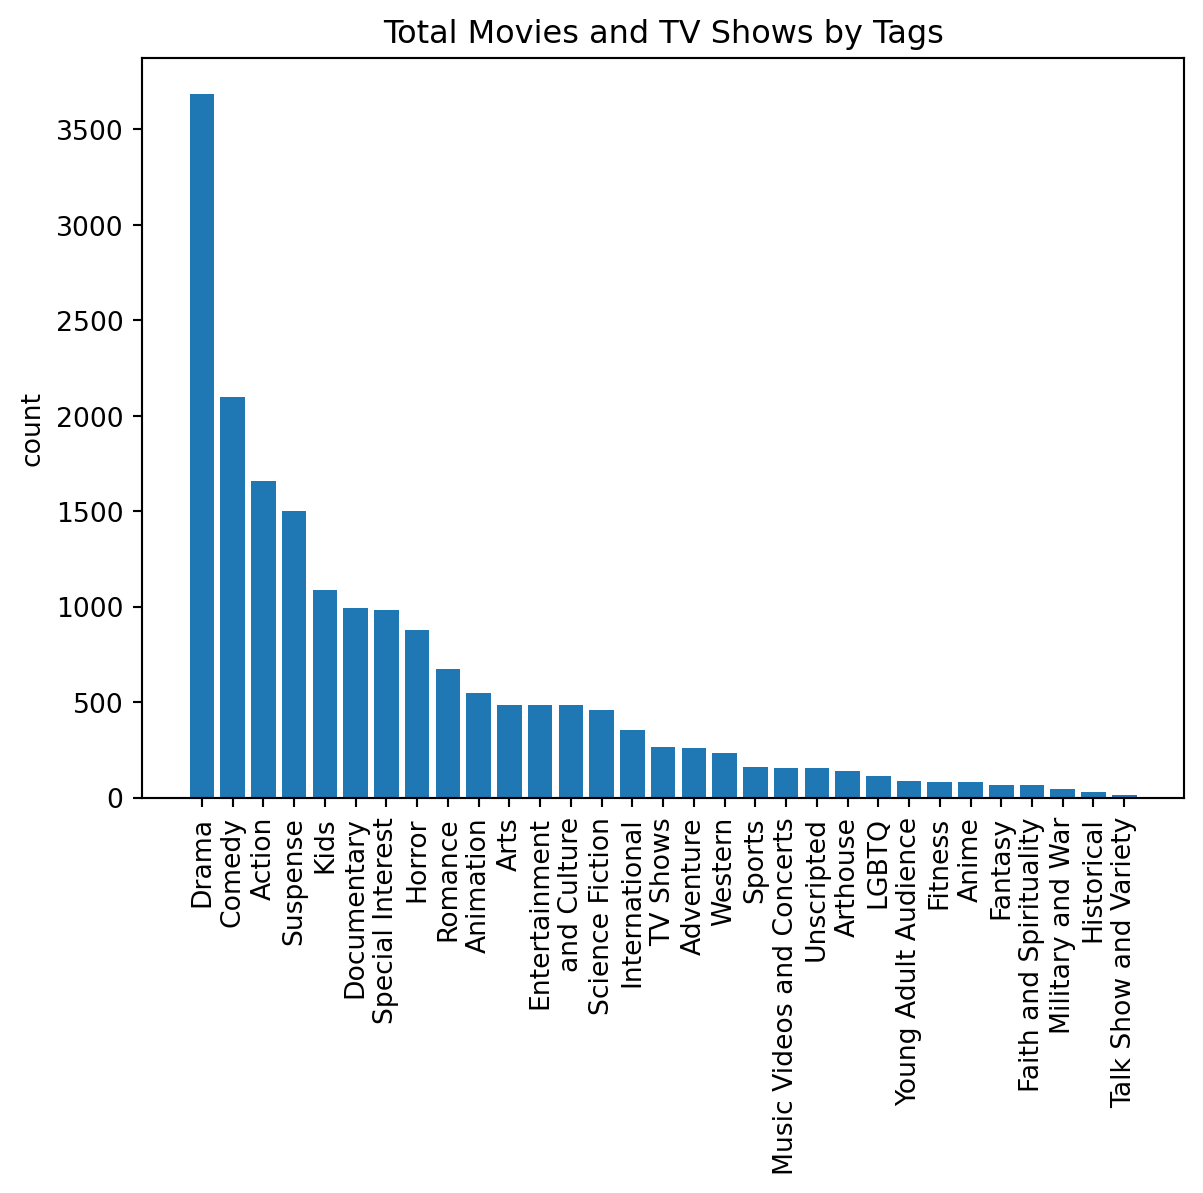

In [3]:
# barplot total movies and tv shows by tag
import matplotlib.pyplot as plt
fig, plot = plt.subplots()
category = [item[0] for item in rank_listed_in]
count = [item[1] for item in rank_listed_in]

plot.bar(category, count)
plot.set_title('Total Movies and TV Shows by Tags')
plot.set_ylabel('count')
plot.tick_params(axis='x', rotation = 90)
plt.show()

Procedemos a realizar un gráfico de torta donde se muestre la proporción
de las categorías mayor o igual a un 5% y cuanto representa el resto de
categorías.

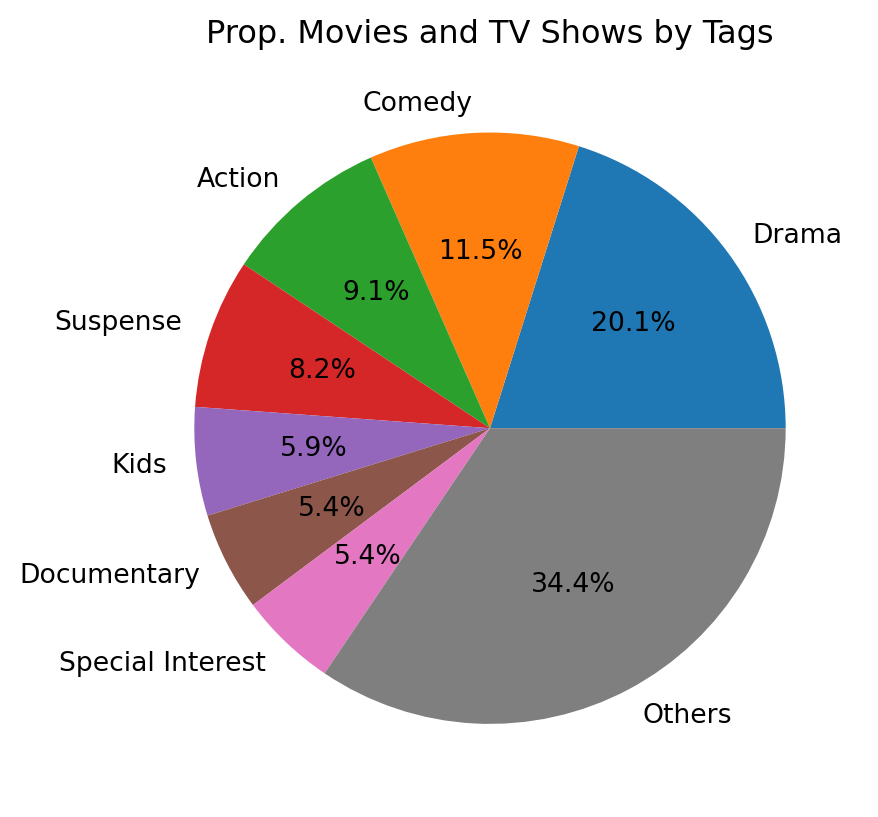

In [4]:
import numpy as np
# pie chart to see top proportions (tags with prop. >= 0.5 ) of movies and tv shows
total_mov = np.sum(count)
prop = [i/total_mov for i in count]
prop2 = list(filter(lambda x: x > 0.049, prop ))
prop2.append(1-np.sum(prop2))
tags = category[:len(prop2)]
tags[len(tags)-1] = 'Others'

fig, plot = plt.subplots()
plot.pie(prop2, labels = tags, autopct = '%1.1f%%')
plot.set_title('Prop. Movies and TV Shows by Tags')
plt.show()

Ahora se realiza un gráfico de barras donde se muestra el consumo de TV
Shows y Películas por país. Para ello contamos el numero de películas y
tv shows por país y seleccionaremos los países con una frecuencia
relativa mayor al 4%, el resto de países serán agrupados en una
categoría que llamaré **Others**.

[('United States', 334), ('India', 246), ('United Kingdom', 67), ('Canada', 35), ('France', 20), ('Germany', 17), ('Italy', 14), ('Spain', 11), ('Japan', 6), ('China', 6), ('Denmark', 6), ('Australia', 6), ('Brazil', 5), ('Belgium', 5), ('Switzerland', 4), ('Netherlands', 3), ('Mexico', 3), ('Sweden', 3), ('Austria', 3), ('Czech Republic', 2), ('Ireland', 2), ('South Africa', 2), ('Kosovo', 2), ('Thailand', 1), ('Chile', 1), ('Argentina', 1), ('New Zealand', 1), ('Portugal', 1), ('Hungary', 1), ('Iran', 1), ('Luxembourg', 1), ('Monaco', 1), ('Egypt', 1), ('United Arab Emirates', 1), ('Singapore', 1), ('South Korea', 1), ('Afghanistan', 1), ('Colombia', 1), ('Norway', 1), ('Kazakhstan', 1), ('Malaysia', 1), ('Poland', 1), ('Albania', 1), ('Georgia', 1), ('Hong Kong', 1)]
[0.4053398058252427, 0.29854368932038833, 0.08131067961165049, 0.04247572815533981, 0.024271844660194174, 0.02063106796116505, 0.01699029126213592, 0.013349514563106795, 0.007281553398058253, 0.007281553398058253, 0.007

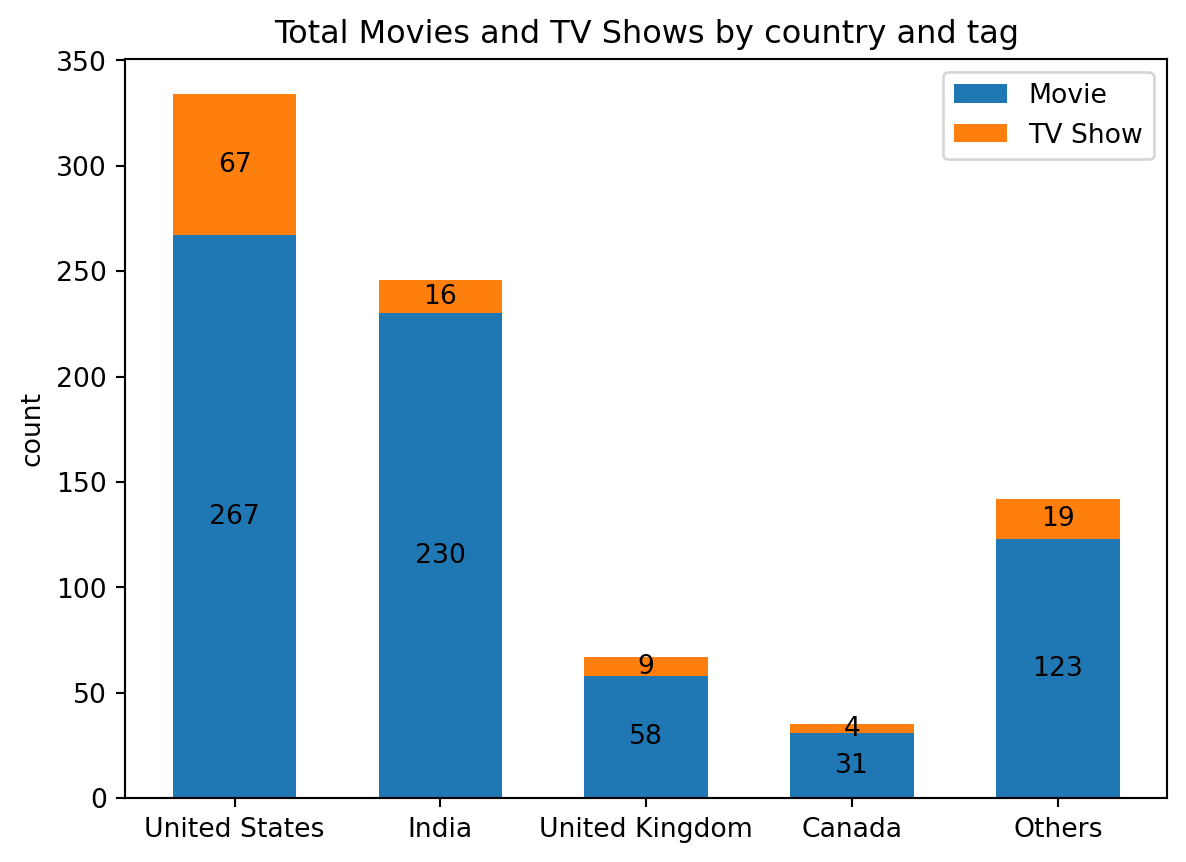

In [5]:
# movie consumer count by country and type
# make a dict where keys are countries and values are a dict where keys are
# tags and values tag count
country_dict = {}
idx1 = 1
idx2 = 5
for item in my_data[1:]:
  tipo = item[idx1]
  countries = item[idx2].split(',')
  countries = [i.strip() for i in countries]
  for c in countries:
    if c not in country_dict:
      country_dict[c] = {tipo : 1}
    else:
      country_dict[c][tipo] = country_dict[c].get(tipo, 0) + 1

# sort by countries more often
n_country = [( c, np.sum( list(country_dict[c].values()) ) ) for c in country_dict]
n_country.sort(reverse= True, key = lambda x: x[1])

# skip NA values
n_country = n_country[1:]
print(n_country)

# filter for prop. of countries greater than 0.04
total_country = np.sum([i[1] for i in n_country])
prop = [i[1]/total_country for i in n_country]
print(prop)
prop2 = list(filter(lambda x: x > 0.04, prop ))
print(prop2)

# put countries with a prop. less than 0.04 in a new tag (Others)
item = ('Others', np.sum([i[1] for i in n_country[len(prop2):]]))
n_country = n_country[:len(prop2)]
n_country.append(item)
print(n_country)

# make a dict only with a country ratio greater than 0.04 and add a new key 'Others'
dict2 = {'Others': {'Movie': 0, 'TV Show': 0}}
countries = [c[0] for c in n_country]
for key in country_dict.keys():
  if key == '':
    continue
  if key in countries:
    dict2[key] = country_dict[key]
  else:
    for k in country_dict[key]:
      dict2['Others'][k] += country_dict[key][k]
print(dict2)

# make a dict where keys are type of show and values are a list with total shows
# by countries and type
dict3 = {'Movie': [], 'TV Show': []}
for item in n_country:
  for k in dict2[item[0]]:
    dict3[k].append(dict2[item[0]][k])
print(dict3)

# make a bar plot for countries and type of show
fig, plot = plt.subplots()
bottom = np.zeros(len(countries))
width = 0.6

for country, tipo in dict3.items():
  p = plot.bar(countries, tipo, width, label = country, bottom = bottom)
  bottom += tipo
  plot.bar_label(p, label_type = 'center')

plot.set_title('Total Movies and TV Shows by country and tag')
plot.set_ylabel('count')
plot.legend()
plt.show()

Volvemos a realizar un gráfico de barras, esta vez apilado donde se
muestre la proporción del consumo de TV Shows y Movies por países.

{'Others': {'Movie': 0.87, 'TV Show': 0.13}, 'Canada': {'Movie': 0.89, 'TV Show': 0.11}, 'India': {'Movie': 0.93, 'TV Show': 0.07}, 'United States': {'Movie': 0.8, 'TV Show': 0.2}, 'United Kingdom': {'Movie': 0.87, 'TV Show': 0.13}}
{'Movie': [0.8, 0.93, 0.87, 0.89, 0.87], 'TV Show': [0.2, 0.07, 0.13, 0.11, 0.13]}


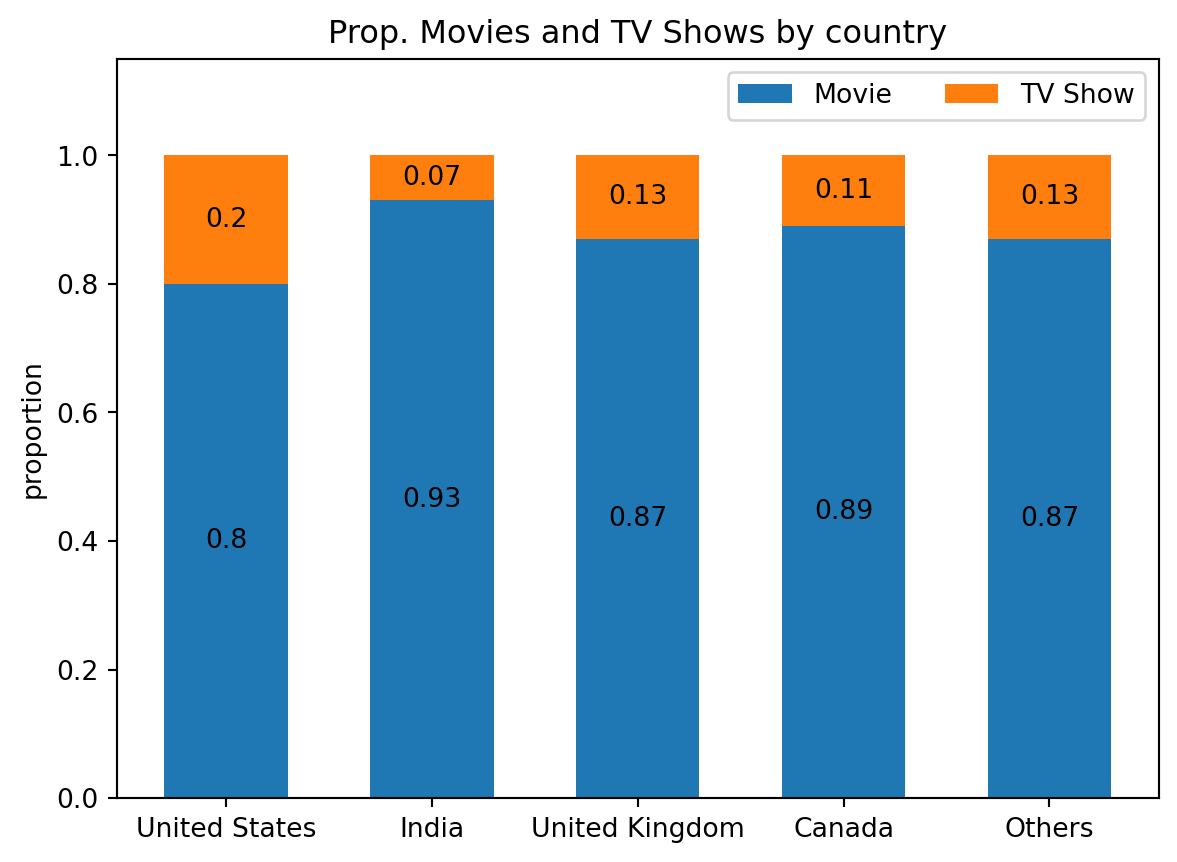

In [6]:
# barplot with prop. of movies and tv shows by country
# make a nested dict where keys are countries and values are a dict where
# keys are tags and values are prop. of tags
dict2 = {key: {k: round(v/np.sum(list (val.values())), 2) for k, v in val.items()}
          for key, val in dict2.items()}
print(dict2)

# make a dict where keys are movie and tv show and values are a list with prop. of
# movies and tv shows by countries
dict3 = {'Movie': [], 'TV Show': []}
for item in n_country:
  for k in dict2[item[0]]:
    dict3[k].append(dict2[item[0]][k])
print(dict3)

# barplot of prop. of movies and tv shows by country
fig, plot = plt.subplots()
bottom = np.zeros(len(countries))
width = 0.6

for country, tipo in dict3.items():
  p = plot.bar(countries, tipo, width, label = country, bottom = bottom)
  bottom += tipo
  plot.bar_label(p, label_type = 'center')

plot.set_title('Prop. Movies and TV Shows by country')
plot.set_ylabel('proportion')
plot.legend(loc = 'upper right', ncol = 2)
plot.set_ylim(0, 1.15)
plt.show()

Para finalizar se realizaran dos histogramas para visualizar la
distribución del numero de minutos por película y la distribución del
numero de temporadas por tv shows.

[113, 110, 74, 69, 45] [1, 1, 1, 1, 1]
7814 1854


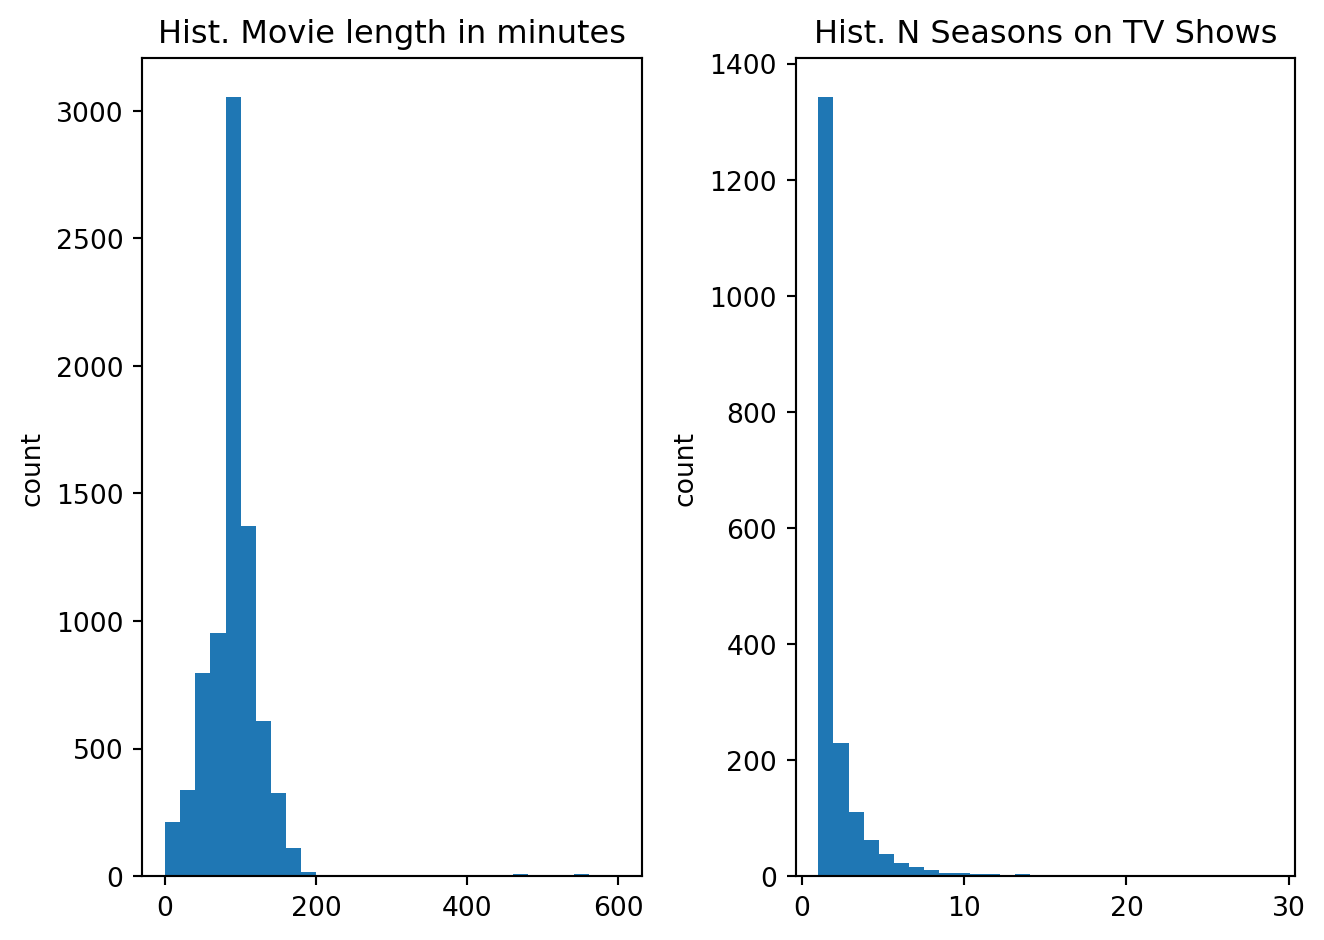

In [7]:
# histogram of length of movies in minutes and number of seasons of tv shows
movie = []
serie  = []
idx = 9
for item in my_data[1:]:
  value = item[idx].split(' ')
  if value[1] == 'min':
    movie.append(int(value[0]))
  else:
    serie.append(int(value[0]))
print(movie[:5], serie[:5])
print(len(movie), len(serie))

data = [movie, serie]

fig, plot = plt.subplots(1, 2, sharey = False, tight_layout = True)
titles = ['Hist. Movie length in minutes', 'Hist. N Seasons on TV Shows']
for i in range(len(data)):
  plot[i].hist(data[i], bins = 30)
  plot[i].set_title(titles[i])
  plot[i].set_ylabel('count')